In [3]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

In [4]:
data = pd.read_csv('data/task_data.csv')
data.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


In [5]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI - от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец - reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаем фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5), dpi=400) # , dpi=400
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость - линия, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даем графику название
    ax.set_title('Точечный график с границей принятия решения');  # Scatter Plot with Decision Boundary
    #Смещаем легену в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

In [6]:
#Создаем матрицу признаков X и столбец с ответами y
X = data.drop(['SNo', 'y'], axis=1)
y = data['y']
X

,X_1,X_2
0,-0.869144,0.389310
1,-0.993467,-0.610591
2,-0.834064,0.239236
3,-0.136471,0.632003
4,0.403887,0.310784
...,...,...
95,0.531635,-0.479185
96,-0.650192,0.655303
97,0.985299,0.118333
98,-0.275289,0.005730


In [7]:
#Создаем объект класса логистическая регрессия
log_reg_full = linear_model.LogisticRegression(solver='sag', random_state=42) #, max_iter=1000
#Обучаем модель, минизируя logloss
log_reg_full.fit(X, y)
#Делаем предсказание класса
y_pred = log_reg_full.predict(X)
#Создадим временную таблицу X
X_temp = X.copy()
#Добавим в эту таблицу результат предсказания
X_temp['Prediction'] = y_pred
X_temp.tail()

,X_1,X_2,Prediction
95,0.531635,-0.479185,1.0
96,-0.650192,0.655303,1.0
97,0.985299,0.118333,1.0
98,-0.275289,0.005730,0.0
99,0.281860,0.726376,1.0


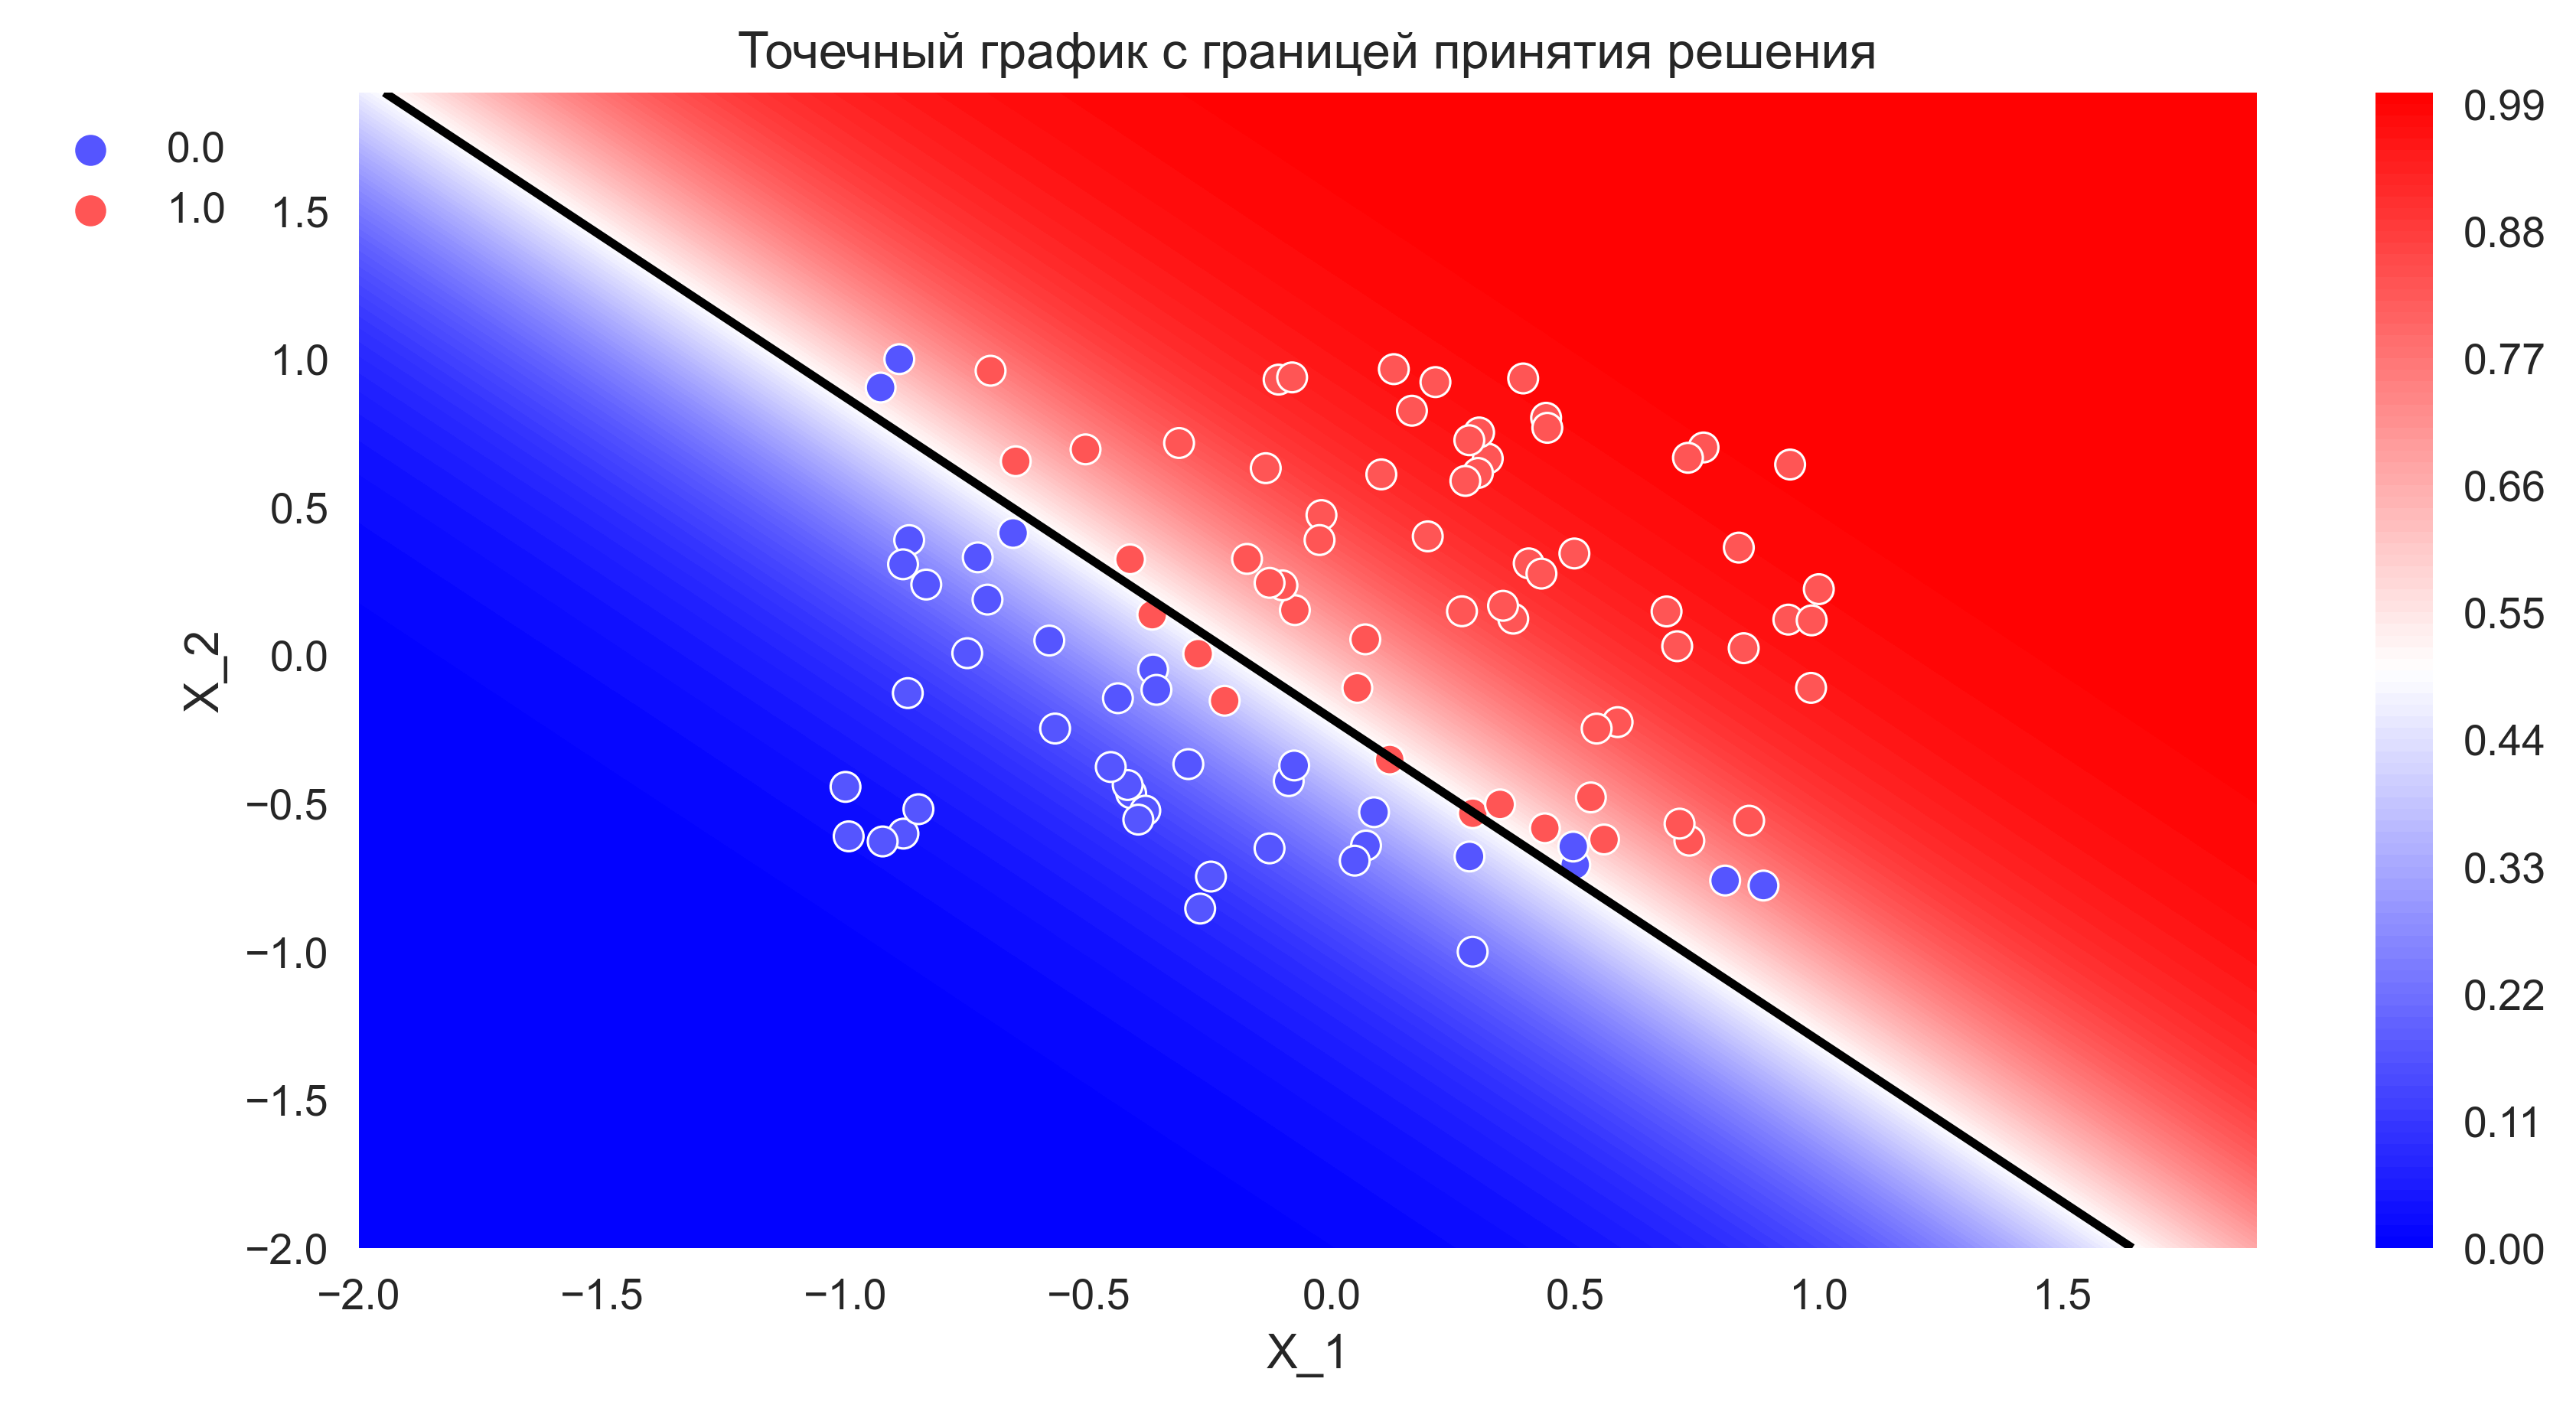

In [8]:
plot_probabilities_2d(X, y, log_reg_full)

### Задание 3.6

У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики precision.

Ответ округлите до сотых.

In [11]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1] 
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

pr_3_6 = metrics.precision_score(y_true, y_pred)
pr_3_6

0.75

### Задание 3.7

У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики recall.

Ответ округлите до сотых.

In [12]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1] 
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

rec_3_7 = metrics.recall_score(y_true, y_pred)
rec_3_7

0.6

### Задание 3.8

У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики .

Ответ округлите до сотых.

In [14]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1] 
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

f1_3_8 = metrics.f1_score(y_true, y_pred)
round(f1_3_8, 2)

0.67